# 逻辑回归

## 二元逻辑回归

逻辑回归模型也是计算输入特征的加权和（加上偏置项），但是不同于线性回归模型直接输出结果，它输出的结果是数理逻辑。 

逻辑回归模型概率估算：$$ \hat{p}= h_\theta(x) = \frac{1}{1+ e^{-\theta^T x}} $$

逻辑回归模型预测 $$ \hat{y}= \begin{cases} 0(\hat{p}<0.5) \\  1(\hat{p}>=0.5 ) \end{cases}$$

单个实例训练的成本函数$$ c(\theta) = \begin{cases} -log(\hat{p}) \\  -log(1-\hat{p})  \end{cases}$$

这个成本函数非常巧妙，当t接近于0的时候，-log(t)会变得非常大，所以如果模型估算一个正类实例的概率接近于0，成本将会变得非常高。同理估算出一个父类实例的概率接近于1，成本也会变得非常高，那么反过来，当t接近于1的时候，-log(t)接近于0，所以对于一个负类实例估算出的概率接近于0，对于一个正类实例估算出的概率接近于1，而成本都接近于0。

逻辑回归成本函数 $$ J(\theta) = - \frac{1}{m} \sum_{i=1}^n[ y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)}) ] $$  

逻辑成回归成本函数的偏导数 $$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^n( h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$  

$$ \nabla_\theta MSE(\theta) = \frac{1}{m}X^T \cdot(h(X \cdot \theta) -Y)$$

逻辑回归的成本函数没有必式解，但是是一个凸函数，所以通过梯度下降保证能够找出全局最小值。

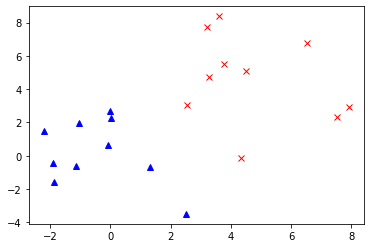

In [74]:
import numpy as np
from matplotlib import pyplot as plt

X = np.r_[np.random.randn(10,2)*2, np.random.randn(10,2)*3+5 ]
Y = np.r_[np.ones((10,1)),np.zeros((10,1))]

plt.plot(X[0:10,0],X[0:10,1],'^b')
plt.plot(X[10:20,0],X[10:20,1],'xr')
plt.show()

101
[0, 1, 0, 0]


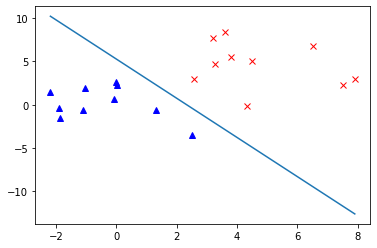

In [77]:
import math
np.set_printoptions(suppress=True)

class Logistic:
    
    theta = []
    iterations = 0

    def predict(self,x):
        x = np.c_[np.ones((len(x),1)),x]
        result = []
        hx = self.h(x.dot(self.theta))
        #print(hx)
        for i in range(len(hx)):
            result.append(1 if hx[i]>=0.5 else 0)
        return result

    def h(self,x):
        if type(x)=='int':
            return 1/(1+math.exp(-x))
        else:
            for i in range(len(x)):
                x[i] = 1/(1+math.exp(-x[i]))
            return x

    def fit(self,X,Y,learning_rate):
        X_b = np.c_[np.ones((len(X),1)),X]
        m,n = len(X_b),len(X_b[0])
        iterations = 0
        theta = np.random.randn(n,1)
        while True:
            iterations +=1
            batch = m//5
            temp_theta = theta
            for i in range(0,m,batch):
                xi = X_b[i:i+batch if i+batch <= m else m]
                yi = Y[i:i+batch if i+batch <= m else m]
                gradients = xi.T.dot( self.h(xi.dot(temp_theta)) -yi)
                #print((h( xi.dot(temp_theta) ) -yi).shape) #(4,1)
                #print(xi.T.shape) #(3,4)
                #print( xi.T.dot( h(xi.dot(temp_theta)) -yi).shape)
                #print(gradients.shape)
                #return 
                temp_theta = temp_theta - learning_rate*gradients
            if np.linalg.norm(theta -temp_theta)<0.00001 or iterations>100:
                self.theta = theta 
                self.iterations = iterations
                return theta
            theta = temp_theta
        
    
logistic = Logistic()
theta = logistic.fit(X,Y,0.7)
print(logistic.iterations)
x_new = np.random.randn(4,2)*2+3
print(logistic.predict(x_new))

x1_new = np.linspace(np.min(X[:,0]),np.max(X[:,0]),10).reshape(10,1)
x2_new = []
for i in range(10):
    x2_new.append( (0.5-theta[0,0] -theta[1,0]*x1_new[i])/theta[2,0] )
    
plt.plot(x1_new,x2_new)
plt.plot(X[0:10,0],X[0:10,1],'^b')
plt.plot(X[10:20,0],X[10:20,1],'xr')
plt.show()

## 多元逻辑回归（Softmax）

Softmax回归模型首先计算出每个类别k的分数 $s_k (x)$，然后对这些分数应用softmax函数（也叫归一化指数），估算出每个类别的概率。

类别k的Softmax分数 $$  s_k(x) = \theta_k^T \cdot x $$
注意，每个类别都有自己特定的参数向量$\theta_k $。所有这些向量通常都作为行存储在参数矩阵$\Theta$中。

计算完每个类别的分数后，就可以通过Softmax函数来计算分数：计算出每个分数的指数，然后对他们进行归一化处理（除以所有指数的总和）即得到$\hat{p}_k$，也就是属于类别k的概率。

Softmax函数 $$ \hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{i=1}^Kexp(s_j(x))} $$
* K是类别的数量
* s(x) 是每个类别的分数的向量
* \sigma(s(x))_k是给定的类别分数下，实例x属于类别k的概率
和逻辑回归分类器一样，Softmax回归分类器将估算概率最高的类别作为预测类别（也就是分数最高的类别）。

Softmax回归分类预器预测 $$ \hat{p}=\mathop{argmax}\limits_k \sigma(s(x))_k = \mathop{argmax}\limits_k(s(x)) =\mathop{argmax}\limits_k (\theta_k^T \cdot x)$$  
Softmax回归分类器一次只会预测一个类别（也就是说，它是多类别，但是不是多输出），所以应该仅适用于互斥的类别之上。  

交叉熵成本函数 $$  \large{ J(\Theta) = - \frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y^{(i)log(\hat{p}_k^{(i)})}  } $$
* 如果都i个实例的目标类别为k，则 $ y_k^{(i)}$等于1，否则等于0。
如果只有两个类别（K=2）时，该成本函数等价于逻辑回归的成本函数。

对于类别K的交叉熵梯度向量 $$  \nabla_{\theta_k} J(\Theta) = \frac{1}{m} \sum_{i=1}^m (\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)} $$
可以计算出每个类别的梯度向量，然后使用梯度下降（或其他优化算法）找到最小化成本函数的参数矩阵$\Theta$。

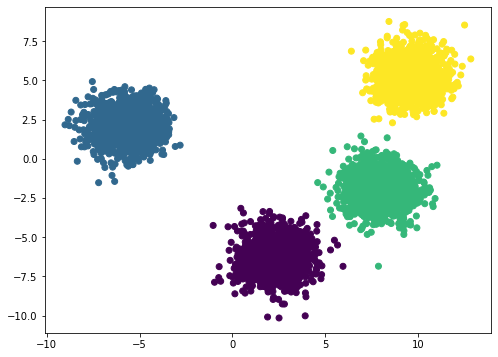

In [30]:
from sklearn.datasets import  make_blobs
from sklearn.model_selection import train_test_split

X, Y = make_blobs(centers=4, n_samples = 5000)

Y = Y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, Y)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [72]:

class SoftmaxRegression:
    
    weights = []
    
    def softmax(self,scores):
        exp = np.exp(scores)
        sum_exp = np.sum(np.exp(scores),axis=1,keepdims=True) #同一行相加，保持二维的特性（不然会变一维矩阵）
        return exp/sum_exp

    def predict(self,X):
        X = np.c_[np.ones((len(X),1)),X]
        s = X.dot(self.weights.T)
        p = self.softmax(s)
        return np.argmax(p,axis=1)[:,np.newaxis]

    def train(self,X,Y,n_iterations =1000,learning_rate=0.1, n_classes=3):
        m = len(X)
        y_one_hot = np.zeros((m, n_classes))
        y_one_hot[np.arange(m), Y.T] = 1  #这里的y_one_hat是一个 m x n_classes维矩阵，每行第k类即第k列为1，该行其余都为0
        X = np.c_[np.ones((m,1)),X]
        weights = np.random.rand(n_classes,len(X[0]))
        iterations = 0
        while True:
            iterations +=1
            s = X.dot(weights.T) #分数
            p = self.softmax(s)
            #print(p.shape)
            temp =  p - y_one_hot
            gradients = 1/m * X.T.dot( temp )
            weights = weights - learning_rate * gradients.T
            if iterations>n_iterations or (np.linalg.norm(gradients)<0.0001):
                self.weights = weights
                return weights

softmax = SoftmaxRegression()
w_trained = softmax.train(X_train, y_train,n_iterations =1000, learning_rate=0.2, n_classes=4)
n_test_samples, _ = X_test.shape
y_predict = softmax.predict(X_test)
print("true：",np.sum(y_predict == y_test))
print('total：',n_test_samples)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples) * 100}%")

true： 1250
total： 1250
Classification accuracy on test set: 100.0%
